In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Analysis of data

In [2]:
df = pd.read_csv('AdClickInfo.csv')
df.head()

,Customer ID,Date Time,Ad ID,Gender,Age,Holiday,Working,probs,click
0,104474,2024-09-01 07:07:24,4,M,40,NaN,False,0.47,1
1,129899,2024-09-01 07:10:42,5,M,20,NaN,False,0.09,1
2,121047,2024-09-01 07:15:12,3,M,50,NaN,False,0.10,0
3,133576,2024-09-01 07:20:03,2,M,47,NaN,False,0.13,0
4,112276,2024-09-01 07:20:52,4,M,45,NaN,False,0.49,0


In [3]:
df.shape

(100000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Customer ID  100000 non-null  int64  
 1   Date Time    100000 non-null  object 
 2   Ad ID        100000 non-null  int64  
 3   Gender       100000 non-null  object 
 4   Age          100000 non-null  int64  
 5   Holiday      3069 non-null    object 
 6   Working      100000 non-null  bool   
 7   probs        100000 non-null  float64
 8   click        100000 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 6.2+ MB


### Daily analysis of CTR

In [5]:
print ('starting day is', df['Date Time'].min())
print ('ending day is', df['Date Time'].max())

starting day is 2024-09-01 07:07:24
ending day is 2025-11-02 21:10:24


In [6]:
df['Date'] = df['Date Time'].apply(lambda x: str(x)[:10])

In [7]:
dfdaily = df[['click', 'Date']].groupby('Date').agg(['count', 'mean']).reset_index()
dfdaily.head()

Date click          
              count      mean
0  2024-09-01   193  0.150259
1  2024-09-02   238  0.281513
2  2024-09-03   238  0.138655
3  2024-09-04   237  0.189873
4  2024-09-05   243  0.156379

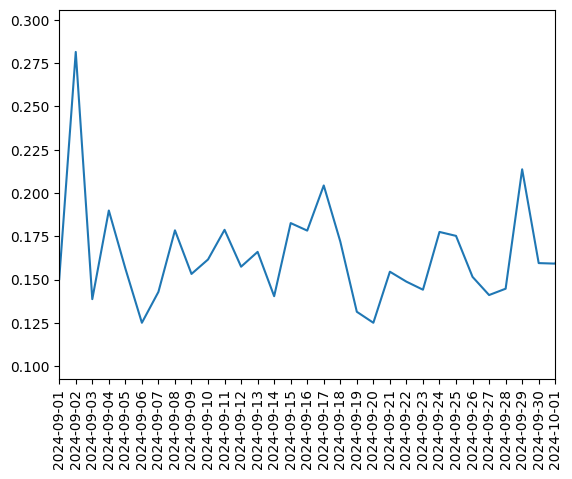

In [8]:
plt.plot(dfdaily['Date'], dfdaily['click']['mean'])
plt.xlim('2024-09-01', '2024-10-01')
plt.xticks(rotation=90)
plt.show()

In [9]:
df.loc[df['Holiday'].isna(), 'Holiday'] = "NoHoliday"
df.head()

,Customer ID,Date Time,Ad ID,Gender,Age,Holiday,Working,probs,click,Date
0,104474,2024-09-01 07:07:24,4,M,40,NoHoliday,False,0.47,1,2024-09-01
1,129899,2024-09-01 07:10:42,5,M,20,NoHoliday,False,0.09,1,2024-09-01
2,121047,2024-09-01 07:15:12,3,M,50,NoHoliday,False,0.10,0,2024-09-01
3,133576,2024-09-01 07:20:03,2,M,47,NoHoliday,False,0.13,0,2024-09-01
4,112276,2024-09-01 07:20:52,4,M,45,NoHoliday,False,0.49,0,2024-09-01


In [10]:
df['Holiday'].unique()

array(['NoHoliday', 'Labor Day', 'Columbus Day', 'Veterans Day',
       'Thanksgiving Day', 'Christmas Day', "New Year's Day",
       'Martin Luther King Jr. Day', "Washington's Birthday",
       'Memorial Day', 'Juneteenth National Independence Day',
       'Independence Day'], dtype=object)

In [11]:
coll = df.columns
reqcoll = coll[[3,4,5,6]]
print (reqcoll)

Index(['Gender', 'Age', 'Holiday', 'Working'], dtype='object')


~~~~~~~~~~~~~~~~~~~~
Gender
  Gender  click          
          count      mean
0      F  40289  0.153044
1      M  59711  0.172732


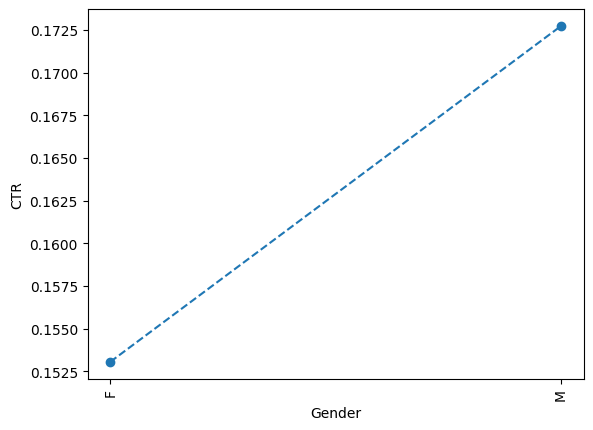

~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~
Age
  Age click          
      count      mean
0  18   849  0.227326
1  19  1582  0.214286
2  20  1627  0.220037
3  21  1601  0.209869
4  22  1909  0.187009


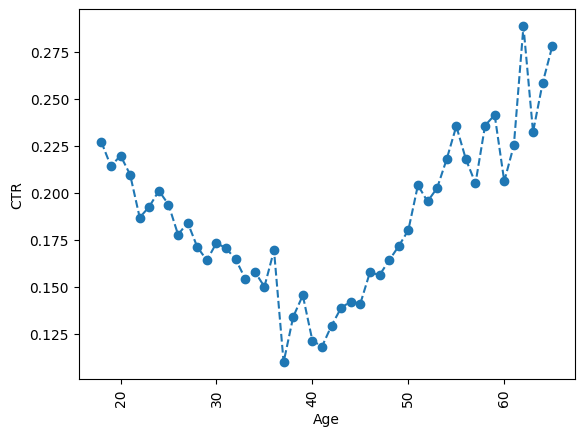

~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~
Holiday
                                Holiday click          
                                        count      mean
0                         Christmas Day   224  0.254464
1                          Columbus Day   477  0.228512
2                      Independence Day   237  0.265823
3  Juneteenth National Independence Day   243  0.296296
4                             Labor Day   475  0.275789


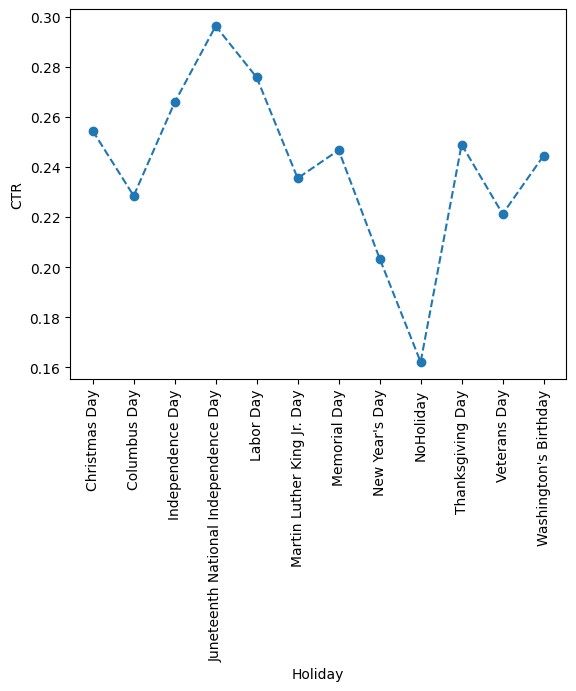

~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~
Working
  Working  click          
           count      mean
0   False  28635  0.161620
1    True  71365  0.166076


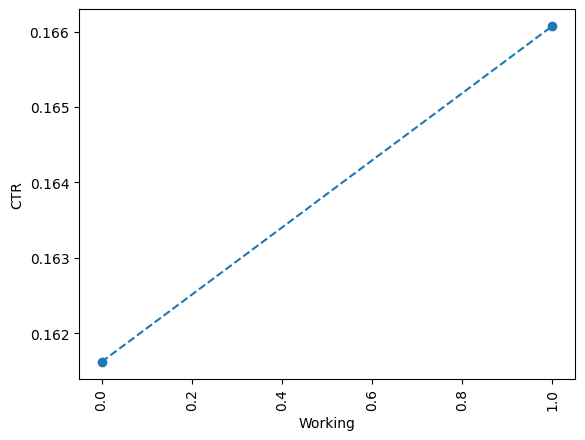

~~~~~~~~~~~~~~~~~~~~


In [12]:
for c in reqcoll:
    print ('~~~~~~~~~~~~~~~~~~~~')
    print (c)
    df1 = df[[c, 'click']].groupby(c).agg(['count', 'mean']).reset_index()
    print (df1.head())
    plt.plot(df1[c],df1['click']['mean'], 'o--')
    plt.xticks(rotation=90)
    plt.xlabel(c)
    plt.ylabel('CTR')
    plt.show()
    print ('~~~~~~~~~~~~~~~~~~~~')

## Group by two features

In [13]:
df11 = df[['Age', 'Ad ID', 'click']].groupby(['Age', 'Ad ID']).agg(['count', 'mean']).reset_index()

In [14]:
df11

Age Ad ID click          
              count      mean
0    18     1   181  0.209945
1    18     2   168  0.589286
2    18     3   147  0.088435
3    18     4   173  0.075145
4    18     5   180  0.166667
..   ..   ...   ...       ...
235  65     1    39  0.153846
236  65     2    23  0.130435
237  65     3    29  0.689655
238  65     4    32  0.218750
239  65     5    28  0.214286

[240 rows x 4 columns]

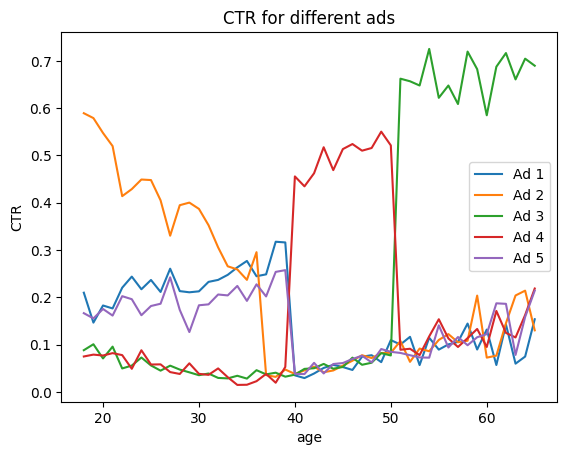

In [15]:
for i in range(1, 6):
    df111 = df11[df11['Ad ID'] == i]
    plt.plot(df111['Age'], df111['click']['mean'])
    
plt.legend(['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5'])
plt.xlabel('age')
plt.ylabel('CTR')
plt.title('CTR for different ads')
plt.show()

In [16]:
def retagebin(age):
  '''
  function to return age bins
  '''
  if (age < 25):
      return 1
  else:
      x = (age - 25)/5 + 2
      return int(x)

# test function
print (retagebin(37))

4


In [17]:
df['Agebin']  = df['Age'].apply(lambda x: retagebin(x))

In [18]:
df.head()

,Customer ID,Date Time,Ad ID,Gender,Age,Holiday,Working,probs,click,Date,Agebin
0,104474,2024-09-01 07:07:24,4,M,40,NoHoliday,False,0.47,1,2024-09-01,5
1,129899,2024-09-01 07:10:42,5,M,20,NoHoliday,False,0.09,1,2024-09-01,1
2,121047,2024-09-01 07:15:12,3,M,50,NoHoliday,False,0.10,0,2024-09-01,7
3,133576,2024-09-01 07:20:03,2,M,47,NoHoliday,False,0.13,0,2024-09-01,6
4,112276,2024-09-01 07:20:52,4,M,45,NoHoliday,False,0.49,0,2024-09-01,6


In [19]:
df21 = df[['Agebin', 'Ad ID', 'click']].groupby(['Agebin', 'Ad ID']).agg(['count', 'mean']).reset_index()

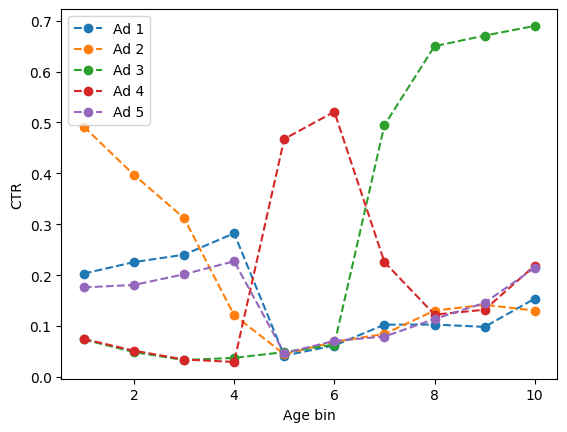

In [20]:
for i in range(1, 6):
    dfx = df21[df21['Ad ID'] == i]
    plt.plot(dfx['Agebin'], dfx['click']['mean'], 'o--')
plt.legend(['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5'])
plt.xlabel('Age bin')
plt.ylabel('CTR')
plt.show()


In [21]:
# Check behaviour over time

In [22]:
df['Month'] = df['Date'].apply(lambda x: x[:7])
df.head()

,Customer ID,Date Time,Ad ID,Gender,Age,Holiday,Working,probs,click,Date,Agebin,Month
0,104474,2024-09-01 07:07:24,4,M,40,NoHoliday,False,0.47,1,2024-09-01,5,2024-09
1,129899,2024-09-01 07:10:42,5,M,20,NoHoliday,False,0.09,1,2024-09-01,1,2024-09
2,121047,2024-09-01 07:15:12,3,M,50,NoHoliday,False,0.10,0,2024-09-01,7,2024-09
3,133576,2024-09-01 07:20:03,2,M,47,NoHoliday,False,0.13,0,2024-09-01,6,2024-09
4,112276,2024-09-01 07:20:52,4,M,45,NoHoliday,False,0.49,0,2024-09-01,6,2024-09


In [23]:
dftmm = df[['Month', 'Ad ID', 'click']].groupby(['Month', 'Ad ID']).agg(['count', 'mean']).reset_index()
dftmm.head()

Month Ad ID click          
                 count      mean
0  2024-09     1  1367  0.256035
1  2024-09     2  1396  0.217765
2  2024-09     3  1378  0.099419
3  2024-09     4  1417  0.193366
4  2024-09     5  1414  0.056577

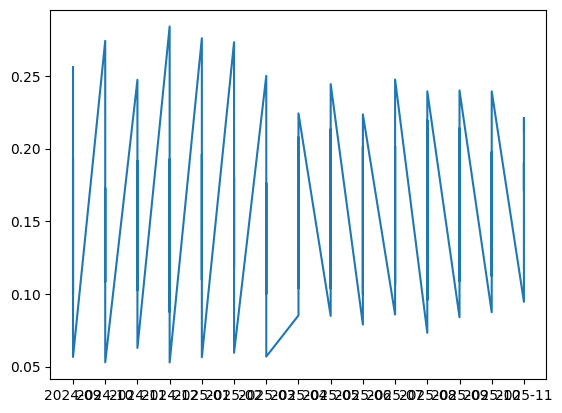

In [24]:
plt.plot(dftmm['Month'], dftmm['click']['mean'])
plt.show()

# Plot CTR as function of age group

In [25]:
dft = df[df['Age'] < 40]
#dft = df.copy()
print (len(dft))
dft.head()

61119


,Customer ID,Date Time,Ad ID,Gender,Age,Holiday,Working,probs,click,Date,Agebin,Month
1,129899,2024-09-01 07:10:42,5,M,20,NoHoliday,False,0.09,1,2024-09-01,1,2024-09
5,102275,2024-09-01 07:27:27,3,M,29,NoHoliday,False,0.00,0,2024-09-01,2,2024-09
7,106520,2024-09-01 07:35:45,4,F,30,NoHoliday,False,0.00,0,2024-09-01,3,2024-09
9,117997,2024-09-01 07:45:16,5,F,24,NoHoliday,False,0.08,0,2024-09-01,1,2024-09
10,102939,2024-09-01 07:51:10,4,F,24,NoHoliday,False,0.00,0,2024-09-01,1,2024-09


In [26]:
dft2 = dft[['Month', 'Ad ID', 'click']].groupby(['Month', 'Ad ID']).agg(['count', 'mean']).reset_index()
dft2.head()

Month Ad ID click          
                 count      mean
0  2024-09     1   805  0.393789
1  2024-09     2   856  0.323598
2  2024-09     3   812  0.039409
3  2024-09     4   859  0.051222
4  2024-09     5   864  0.043981

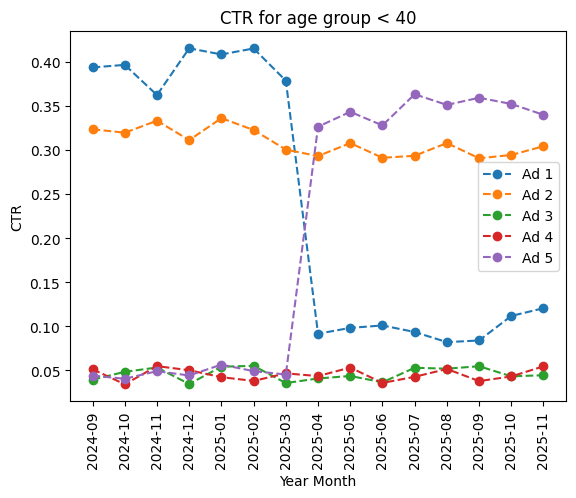

In [27]:
for i in range(1,6):
  dftemp = dft2[dft2['Ad ID'] == i]
  plt.plot(dftemp['Month'], dftemp['click']['mean'], 'o--')
  plt.xlabel('Year Month')
  plt.ylabel('CTR')

plt.title('CTR for age group < 40')
plt.legend(['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5'])
plt.xticks(rotation=90)
plt.show()

# Plot CTR as function of age group & gender

30971


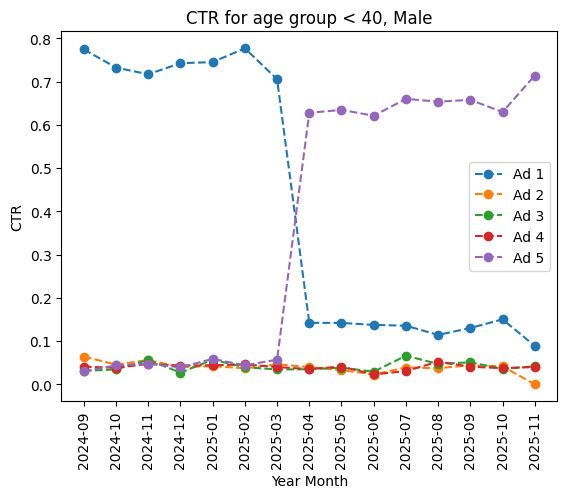

In [28]:
dft = df[df['Age'] < 40]
dft = dft[dft['Gender'] == 'M']
print (len(dft))
dft2 = dft[['Month', 'Ad ID', 'click']].groupby(['Month', 'Ad ID']).agg(['count', 'mean']).reset_index()
dft2.head()

for i in range(1,6):
  dftemp = dft2[dft2['Ad ID'] == i]
  plt.plot(dftemp['Month'], dftemp['click']['mean'], 'o--')
  plt.xlabel('Year Month')
  plt.ylabel('CTR')

plt.title('CTR for age group < 40, Male')
plt.legend(['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5'])
plt.xticks(rotation=90)
plt.show()

30148


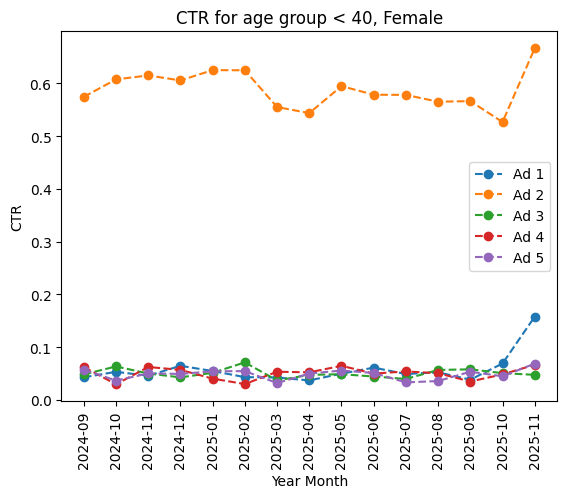

In [29]:
dft = df[df['Age'] < 40]
dft = dft[dft['Gender'] == 'F']
print (len(dft))
dft2 = dft[['Month', 'Ad ID', 'click']].groupby(['Month', 'Ad ID']).agg(['count', 'mean']).reset_index()
dft2.head()

for i in range(1,6):
  dftemp = dft2[dft2['Ad ID'] == i]
  plt.plot(dftemp['Month'], dftemp['click']['mean'], 'o--')
  plt.xlabel('Year Month')
  plt.ylabel('CTR')

plt.title('CTR for age group < 40, Female')
plt.legend(['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5'])
plt.xticks(rotation=90)
plt.show()